## Задание 1: Сравнение CNN и полносвязных сетей (40 баллов)

In [94]:
import torch
from convolutional_basics.datasets import get_mnist_loaders, get_cifar_loaders
from convolutional_basics.models import SimpleCNN, CNNWithResidual, CIFARCNN
from convolutional_basics.trainer import train_model
from convolutional_basics.utils import plot_training_history, count_parameters
import sys
from matplotlib import pyplot as plt
from pathlib import Path

### 1.1 Сравнение на MNIST (20 баллов)
```python
# Сравните производительность на MNIST:
# - Полносвязная сеть (3-4 слоя)
# - Простая CNN (2-3 conv слоя)
# - CNN с Residual Block
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность на train и test множествах
# - Измерьте время обучения и инференса
# - Визуализируйте кривые обучения
# - Проанализируйте количество параметров
```

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
device = torch.device('cpu')
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [84]:
current_dir = Path.cwd()
project_root = current_dir.parent
fc_models_path = project_root / "lesson3-fc-models" / "fully_connected_basics"
sys.path.insert(0, str(fc_models_path))
from models import FullyConnectedModel  

In [85]:
FC_model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 512},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 256},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 128},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
    ]
).to(device)
print(f"FC-Model parameters: {count_parameters(FC_model)}")

print("Training FC-model...")
FC_history = train_model(FC_model, train_loader, test_loader, epochs=5, device=str(device))

FC-Model parameters: 569226
Training FC-model...


100%|██████████| 157/157 [00:02<00:00, 64.98it/s]


Epoch 1/5:
Train Loss: 0.2905, Train Acc: 0.9167
Test Loss: 0.0968, Test Acc: 0.9699
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.51it/s]


Epoch 2/5:
Train Loss: 0.1483, Train Acc: 0.9565
Test Loss: 0.0827, Test Acc: 0.9748
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 59.71it/s]


Epoch 3/5:
Train Loss: 0.1191, Train Acc: 0.9650
Test Loss: 0.0756, Test Acc: 0.9762
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.45it/s]


Epoch 4/5:
Train Loss: 0.1004, Train Acc: 0.9698
Test Loss: 0.0660, Test Acc: 0.9805
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.20it/s]

Epoch 5/5:
Train Loss: 0.0878, Train Acc: 0.9727
Test Loss: 0.0567, Test Acc: 0.9818
--------------------------------------------------


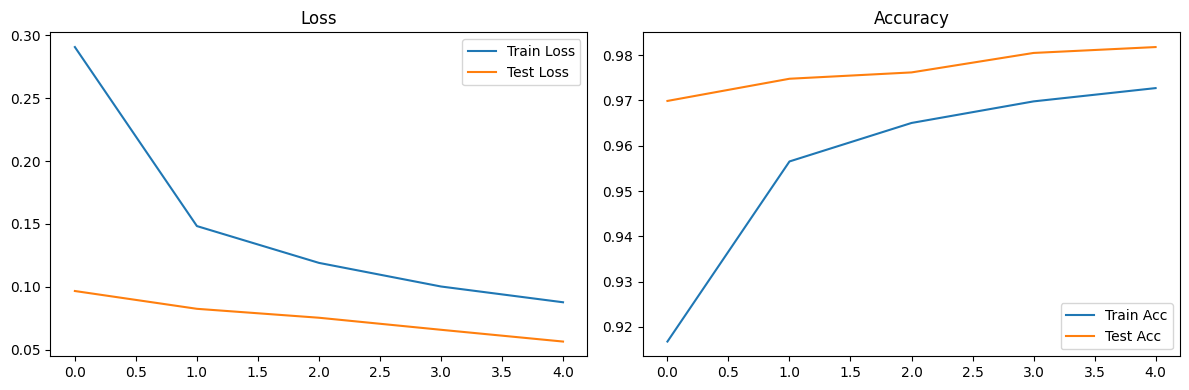

In [86]:
plot_training_history(FC_history)

In [87]:
simple_cnn = SimpleCNN(input_channels=1, num_classes=10).to(device)
print(f"Simple CNN parameters: {count_parameters(simple_cnn)}")

print("Training Simple CNN...")
simple_history = train_model(simple_cnn, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421642
Training Simple CNN...


100%|██████████| 157/157 [00:03<00:00, 39.45it/s]


Epoch 1/5:
Train Loss: 0.1552, Train Acc: 0.9527
Test Loss: 0.0445, Test Acc: 0.9847
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.27it/s]


Epoch 2/5:
Train Loss: 0.0567, Train Acc: 0.9831
Test Loss: 0.0300, Test Acc: 0.9893
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.01it/s]


Epoch 3/5:
Train Loss: 0.0411, Train Acc: 0.9874
Test Loss: 0.0296, Test Acc: 0.9895
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.24it/s]


Epoch 4/5:
Train Loss: 0.0317, Train Acc: 0.9903
Test Loss: 0.0291, Test Acc: 0.9898
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.07it/s]

Epoch 5/5:
Train Loss: 0.0265, Train Acc: 0.9918
Test Loss: 0.0255, Test Acc: 0.9920
--------------------------------------------------


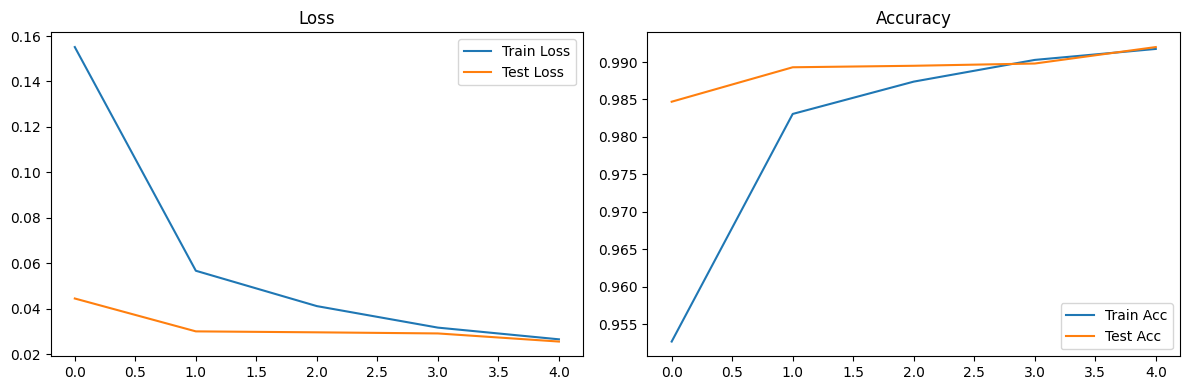

In [88]:
plot_training_history(simple_history)

In [89]:
residual_cnn = CNNWithResidual(input_channels=1, num_classes=10).to(device)
print(f"Residual CNN parameters: {count_parameters(residual_cnn)}")

print("Training Residual CNN...")
residual_history = train_model(residual_cnn, train_loader, test_loader, epochs=5, device=str(device))

Residual CNN parameters: 160906
Training Residual CNN...


100%|██████████| 157/157 [00:09<00:00, 16.52it/s]


Epoch 1/5:
Train Loss: 0.1008, Train Acc: 0.9708
Test Loss: 0.0539, Test Acc: 0.9829
--------------------------------------------------


100%|██████████| 157/157 [00:09<00:00, 16.70it/s]


Epoch 2/5:
Train Loss: 0.0412, Train Acc: 0.9872
Test Loss: 0.0371, Test Acc: 0.9879
--------------------------------------------------


100%|██████████| 157/157 [00:09<00:00, 16.72it/s]


Epoch 3/5:
Train Loss: 0.0336, Train Acc: 0.9891
Test Loss: 0.0299, Test Acc: 0.9895
--------------------------------------------------


100%|██████████| 157/157 [00:09<00:00, 16.58it/s]


Epoch 4/5:
Train Loss: 0.0257, Train Acc: 0.9921
Test Loss: 0.0175, Test Acc: 0.9942
--------------------------------------------------


100%|██████████| 157/157 [00:09<00:00, 16.70it/s]

Epoch 5/5:
Train Loss: 0.0231, Train Acc: 0.9931
Test Loss: 0.0222, Test Acc: 0.9932
--------------------------------------------------


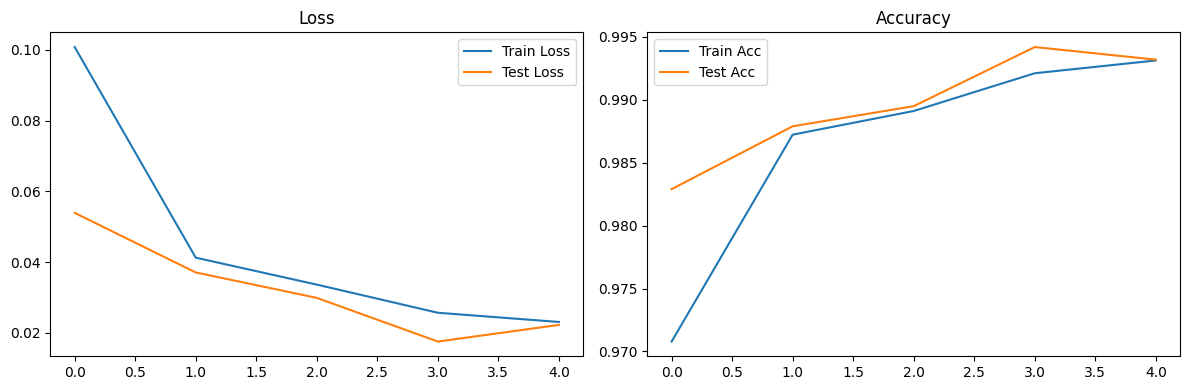

In [90]:
plot_training_history(residual_history)


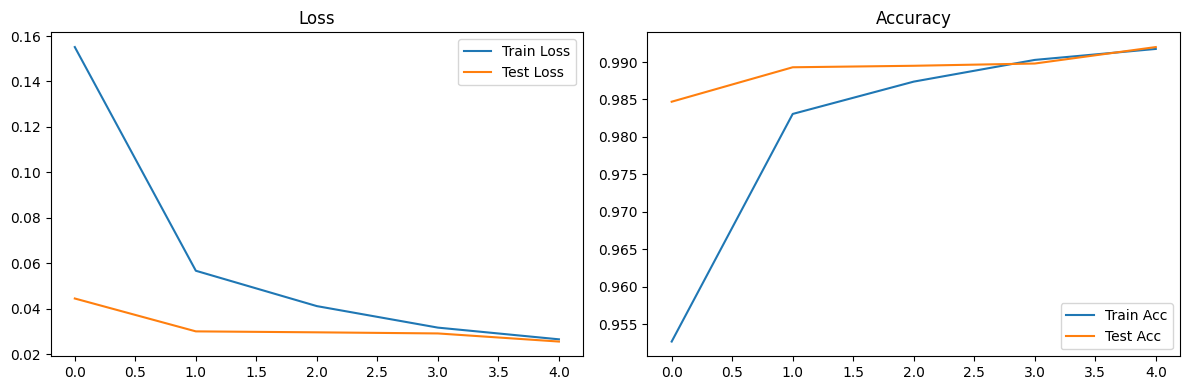

In [91]:
plot_training_history(simple_history)


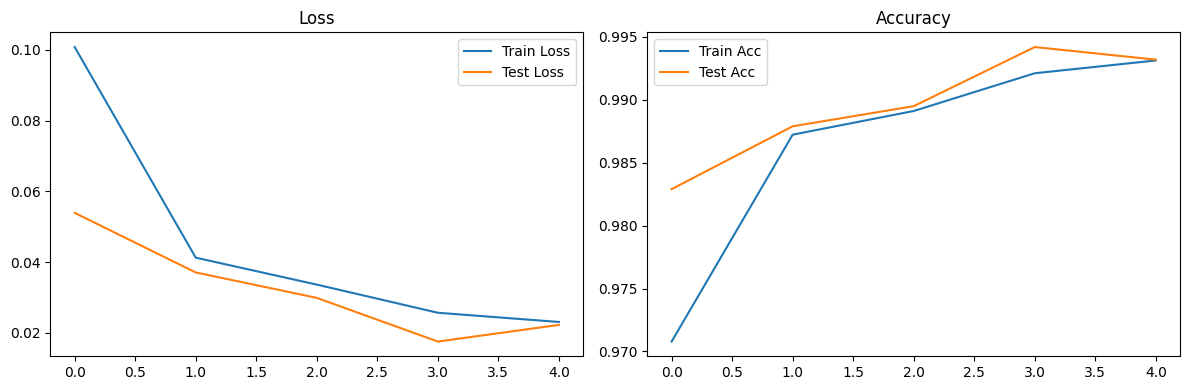

In [92]:
plot_training_history(residual_history)

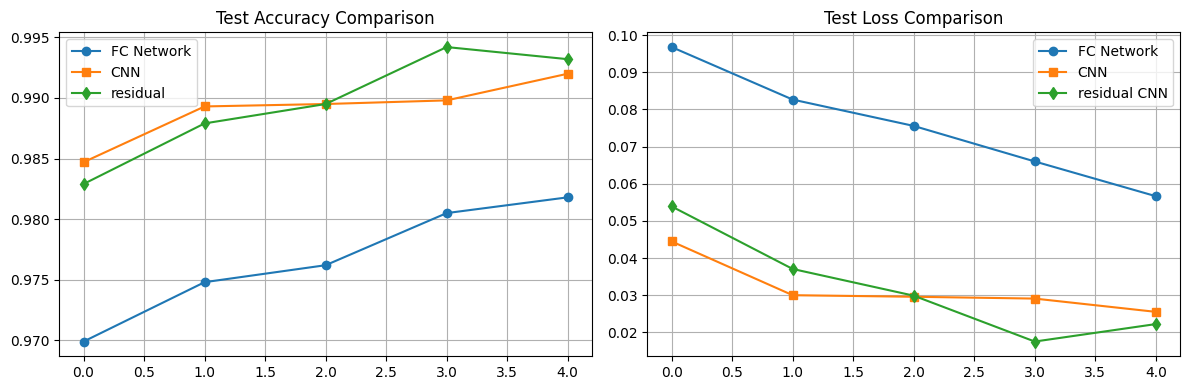

In [93]:
def compare_models(fc_history, cnn_history, residual_history):
    """Сравнивает результаты графики"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(fc_history['test_accs'], label='FC Network', marker='o')
    ax1.plot(cnn_history['test_accs'], label='CNN', marker='s')
    ax1.plot(residual_history['test_accs'], label='residual', marker='d')
    ax1.set_title('Test Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(fc_history['test_losses'], label='FC Network', marker='o')
    ax2.plot(cnn_history['test_losses'], label='CNN', marker='s')
    ax2.plot(residual_history['test_losses'], label='residual CNN', marker='d')
    ax2.set_title('Test Loss Comparison')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show() 
    
    
compare_models(FC_history, simple_history, residual_history) 

In [55]:
print(f'FC-Model max accuracy: {max(FC_history['test_accs'])}')
print(f'Simple CNN max accuracy: {max(simple_history['test_accs'])}')
print(f'Residual CNN max accuracy: {max(residual_history['test_accs'])}')

FC-Model max accuracy: 0.9806
Simple CNN max accuracy: 0.992
Residual CNN max accuracy: 0.9924


<ul>
<li>FC-Model parameters: 569226
<li>Simple CNN parameters: 421642
<li>Residual CNN parameters: 160906
</ul>

<ul>
<li>FC-Model обучалась 1 минуту и 46 секунд
<li>Simple CNN обучалась 3 минуты и 52 секунды
<li>Residual CNN обучалась 14 минут и 29 секунд
</ul>

<ul>
<li>FC-Model max accuracy: 0.9806
<li>Simple CNN max accuracy: 0.992
<li>Residual CNN max accuracy: 0.9924
</ul>

Модели Simple CNN и Residual CNN переобучались, но на всех эпохах имели большую точность чем полносвязная сеть.

Самая точная модель - Residual CNN имеет max accuracy: 0.9924 на 3 эпохею

___


*Графики полетели и пришлось заново обучивать модели, поэтому результаты (числа в выводе) чуть-чуть другие*

### 1.2 Сравнение на CIFAR-10 (20 баллов)
```python
# Сравните производительность на CIFAR-10:
# - Полносвязная сеть (глубокая)
# - CNN с Residual блоками
# - CNN с регуляризацией и Residual блоками
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность и время обучения
# - Проанализируйте переобучение
# - Визуализируйте confusion matrix
# - Исследуйте градиенты (gradient flow)
```

In [58]:
train_loader, test_loader = get_cifar_loaders(batch_size=64)

100%|██████████| 170M/170M [07:06<00:00, 400kB/s] 


In [76]:
FC_model = FullyConnectedModel(
    input_size=3072,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 64},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 32},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
    ]
).to(device)
print(f"FC-Model parameters: {count_parameters(FC_model)}")

print("Training FC-model...")
FC_history = train_model(FC_model, train_loader, test_loader, epochs=5, device=str(device))

FC-Model parameters: 404458
Training FC-model...


100%|██████████| 157/157 [00:02<00:00, 58.37it/s]


Epoch 1/5:
Train Loss: 1.9116, Train Acc: 0.3105
Test Loss: 1.6498, Test Acc: 0.4151
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.50it/s]


Epoch 2/5:
Train Loss: 1.7399, Train Acc: 0.3755
Test Loss: 1.5494, Test Acc: 0.4460
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.66it/s]


Epoch 3/5:
Train Loss: 1.6751, Train Acc: 0.3970
Test Loss: 1.4955, Test Acc: 0.4687
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.28it/s]


Epoch 4/5:
Train Loss: 1.6317, Train Acc: 0.4216
Test Loss: 1.4784, Test Acc: 0.4756
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.81it/s]

Epoch 5/5:
Train Loss: 1.6000, Train Acc: 0.4303
Test Loss: 1.4362, Test Acc: 0.4918
--------------------------------------------------


In [71]:
simple_cnn = CIFARCNN(num_classes=10).to(device)
print(f"Simple CNN parameters: {count_parameters(simple_cnn)}")

print("Training Simple CNN...")
simple_history = train_model(simple_cnn, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 620362
Training Simple CNN...


100%|██████████| 157/157 [00:06<00:00, 26.09it/s]


Epoch 1/5:
Train Loss: 1.3646, Train Acc: 0.5041
Test Loss: 1.0542, Test Acc: 0.6277
--------------------------------------------------


100%|██████████| 157/157 [00:06<00:00, 25.31it/s]


Epoch 2/5:
Train Loss: 0.9334, Train Acc: 0.6708
Test Loss: 0.8262, Test Acc: 0.7095
--------------------------------------------------


100%|██████████| 157/157 [00:05<00:00, 26.84it/s]


Epoch 3/5:
Train Loss: 0.7652, Train Acc: 0.7320
Test Loss: 0.7798, Test Acc: 0.7312
--------------------------------------------------


100%|██████████| 157/157 [00:05<00:00, 26.93it/s]


Epoch 4/5:
Train Loss: 0.6503, Train Acc: 0.7714
Test Loss: 0.7386, Test Acc: 0.7511
--------------------------------------------------


100%|██████████| 157/157 [00:05<00:00, 27.08it/s]

Epoch 5/5:
Train Loss: 0.5617, Train Acc: 0.8036
Test Loss: 0.7052, Test Acc: 0.7614
--------------------------------------------------


In [60]:
residual_cnn = CNNWithResidual(input_channels=3, num_classes=10).to(device)
print(f"Residual CNN parameters: {count_parameters(residual_cnn)}")

print("Training Residual CNN...")
residual_history = train_model(residual_cnn, train_loader, test_loader, epochs=5, device=str(device))

Residual CNN parameters: 161482
Training Residual CNN...


100%|██████████| 157/157 [00:12<00:00, 12.69it/s]


Epoch 1/5:
Train Loss: 1.1901, Train Acc: 0.5741
Test Loss: 0.9892, Test Acc: 0.6493
--------------------------------------------------


100%|██████████| 157/157 [00:12<00:00, 12.87it/s]


Epoch 2/5:
Train Loss: 0.8084, Train Acc: 0.7158
Test Loss: 0.8334, Test Acc: 0.7110
--------------------------------------------------


100%|██████████| 157/157 [00:12<00:00, 12.83it/s]


Epoch 3/5:
Train Loss: 0.6733, Train Acc: 0.7659
Test Loss: 0.7082, Test Acc: 0.7518
--------------------------------------------------


100%|██████████| 157/157 [00:12<00:00, 12.77it/s]


Epoch 4/5:
Train Loss: 0.5872, Train Acc: 0.7964
Test Loss: 0.6579, Test Acc: 0.7757
--------------------------------------------------


100%|██████████| 157/157 [00:12<00:00, 12.82it/s]

Epoch 5/5:
Train Loss: 0.5134, Train Acc: 0.8210
Test Loss: 0.5954, Test Acc: 0.7962
--------------------------------------------------


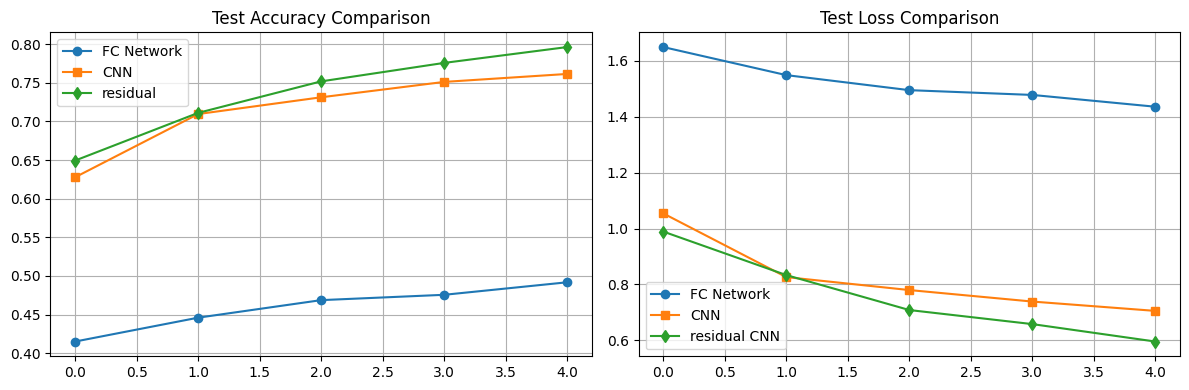

In [81]:
compare_models(FC_history, simple_history, residual_history) 

<ul>
<li>FC-Model parameters: 404458
<li>Simple CNN parameters: 620362
<li>Residual CNN parameters: 161482
</ul>

<ul>
<li>FC-Model обучалась 1 минуту и 31 секунд
<li>Simple CNN обучалась 4 минуты и 50 секунды
<li>Residual CNN обучалась 15 минут и 3 секунд
</ul>

<ul>
<li>FC-Model max accuracy: 0.4918
<li>Simple CNN max accuracy: 0.7614
<li>Residual CNN max accuracy: 0.8210
</ul>

Стоит отметить, что все модели не переобучивались и могут иметь еще большую точность при увеличении эпох 
(это я проверять не буду, т.к. Residual CNN слишком долго обучается даже при 5 эпохах). Полносвязная сеть показала очень плохой результат, Residual CNN демонстрирует самую большую точность


